# Métodos Iterativos para sistemas de ecuaciones lineales

In [1]:
import numpy as np
from scipy.linalg import solve_triangular
import matplotlib.pyplot as plt
from time import time

In [2]:
def jacobi(A, b, n_iter=50, x_0=None):
    """
    Solve Ax=b using Jacobi method
    
    Parameters
    -----------
    A      : (n, n) array
             A matrix 
    b      : (n, ) array
             RHS vector
    n_iter : int
             Number of iterations
    x_0    : (n, ) array
             Initual guess
    
    Returns
    -------
    X      : (n_iter + 1, n) array
             Matrix with approximation at each iteration
    """
    n = A.shape[0] # Matrix size
    X = np.zeros((n_iter + 1, n)) # Matrix with solution at each iteration
    # Initial guess
    if x_0 is not None:
        X[0] = x_0
    D = np.diag(A) # Diagonal of A (only keep a vector with diagonal)
    # Inverse of D. Compute reciprocal of vector elements and then fill diagonal matrix
    D_inv = np.diag(1 / D) # This avoid inverse computation "O(n) instead O(n^3)"
    LU = (A - np.diag(D)) # A - D = L + U (here D is a matrix) - Rembember LU != LU of PA=LU or A=LU
    # Jacobi iteration
    for k in range(n_iter):
        X[k+1] = np.dot(D_inv, (b - np.dot(LU, X[k])))
    return X

In [3]:
def gaussSeidel(A, b, n_iter=50, x_0=None):
    """
    Solve Ax=b using Gauss-Seidel method
    
    Parameters
    -----------
    A      : (n, n) array
             A matrix 
    b      : (n, ) array
             RHS vector
    n_iter : int
             Number of iterations
    x_0    : (n, ) array
             Initual guess
    
    Returns
    -------
    X      : (n_iter + 1, n) array
             Matrix with approximation at each iteration
    """
    n = A.shape[0] # Matrix size
    X = np.zeros((n_iter + 1, n)) # Matrix with solution at each iteration
    # Initial guess
    if x_0 is not None:
        X[0] = x_0
    LD = np.tril(A) # Get lower triangle with main diagonal (L + D)
    U = A - LD # Upper triangle 
    # Gauss-Seidel iteration
    for k in range(n_iter):
        X[k+1] = solve_triangular(LD, b - np.dot(U, X[k]), lower=True)
    return X

In [4]:
def SOR(A, b, w=1.05, n_iter=50, x_0=None):
    """
    Solve Ax=b using SOR(w) method
    
    Parameters
    -----------
    A      : (n, n) array
             A matrix 
    b      : (n, ) array
             RHS vector
    w      : float 
             Omega parameter
    n_iter : int
             Number of iterations
    x_0    : (n, ) array
             Initual guess
    
    Returns
    -------
    X      : (n_iter + 1, n) array
             Matrix with approximation at each iteration
    """
    n = A.shape[0] # Matrix size
    X = np.zeros((n_iter + 1, n)) # Matrix with solution at each iteration
    # Initial guess
    if x_0 is not None:
        X[0] = x_0
    L = np.tril(A, k=-1) # Get lower triangle 
    U = np.triu(A, k=1) # Get Upper triangle 
    D = A - U - L
    # SOR
    for k in range(n_iter):
        X[k+1] = solve_triangular(w * L + D, w * b + np.dot((1 - w) * D - w * U, X[k]), lower=True)
    return X

In [5]:
def error(X, x):
    """
    Compute error of approximation at each iteration
    
    Parameters
    ----------
    X       : (m, n) array
             Matrix with approximation at each iteration
    x       : (n, ) array
             Solution of system 
             
    Returns
    -------
    X_err   : (m, ) array
             Error vector
    """
    X_err = np.linalg.norm(X - x, axis=1, ord=np.inf)
    return X_err

# Ejemplo Apunte

Resolver

\begin{equation}
    \begin{split}
        u + 3v & = -1 \\
        5u + 4v & = 6
    \end{split}
\end{equation}

Primero, lo expresamos de forma matricial:
\begin{equation}
    \begin{bmatrix}
        5 & 4 \\
        1 & 3
    \end{bmatrix} 
    \begin{bmatrix} u \\ v \end{bmatrix}
    =
    \begin{bmatrix} 6 \\ -1 \end{bmatrix}.
\end{equation}

Notar que se intercambiaron filas para asegurar que $A$ sea **estrictamente diagonal dominante**. Comprobemos que se llega a la solución (o cerca) en la iteración que se indica.

In [6]:
A_ap = np.array([[5, 4], [1, 3]])
b_ap = np.array([6, -1])

## Solución Analítica

In [7]:
x_ap = np.linalg.solve(A_ap, b_ap)
x_ap

array([ 2., -1.])

## Jacobi

In [8]:
x_ap_j = jacobi(A_ap, b_ap, 50)
x_ap_j[-1]

array([ 2., -1.])

## Gauss-Seidel

In [9]:
x_ap_g = gaussSeidel(A_ap, b_ap, 17)
x_ap_g[-1]

array([ 2., -1.])

## SOR($\omega$)

In [10]:
x_ap_s = SOR(A_ap, b_ap, 1.09, 9)
x_ap_s[-1]

array([ 2., -1.])

Efectivamente *SOR* obtiene la solución en menos iteraciones.

# Otro ejemplo

In [11]:
A_2 = np.array([
        [3, -1, 0, 0, 0, 0.5],
        [-1, 3, -1, 0, 0.5, 0],
        [0, -1, 3, -1, 0, 0],
        [0, 0, -1, 3, -1, 0],
        [0, 0.5, 0, -1, 3, -1],
        [0.5, 0, 0, 0, -1, 3]
])
b_2 = np.array([2.5, 1.5, 1., 1., 1.5, 2.5])

## Solución de referencia

In [12]:
x_2 = np.linalg.solve(A_2, b_2)
x_2

array([1., 1., 1., 1., 1., 1.])

## Jacobi

In [13]:
X_2_jac = jacobi(A_2, b_2)
X_2_jac[-1]

array([1., 1., 1., 1., 1., 1.])

## Gauss-Seidel

In [14]:
X_2_gss = gaussSeidel(A_2, b_2)
X_2_gss[-1]

array([1., 1., 1., 1., 1., 1.])

## SOR($\omega$)

In [15]:
def error(X, x):
    return np.linalg.norm(X - x, axis=1, ord=np.inf)

Podemos buscar el parámetro $\omega$, analizando el error para un par de iteraciones

In [16]:
n_w = 20
sor_err_2 = np.zeros(n_w)
w_s = np.linspace(1, 1.3, n_w)
for i in range(n_w):
    X_sor_tmp = SOR(A_2, b_2, w_s[i], 5)
    err_tmp_2 = error(X_sor_tmp, x_2)
    sor_err_2[i] = err_tmp_2[-1]
    print("i: %d \t w: %f \t error: %f" % (i, w_s[i], sor_err_2[i]))

i: 0 	 w: 1.000000 	 error: 0.013793
i: 1 	 w: 1.015789 	 error: 0.012247
i: 2 	 w: 1.031579 	 error: 0.010732
i: 3 	 w: 1.047368 	 error: 0.009437
i: 4 	 w: 1.063158 	 error: 0.008973
i: 5 	 w: 1.078947 	 error: 0.008508
i: 6 	 w: 1.094737 	 error: 0.008036
i: 7 	 w: 1.110526 	 error: 0.007551
i: 8 	 w: 1.126316 	 error: 0.007048
i: 9 	 w: 1.142105 	 error: 0.006524
i: 10 	 w: 1.157895 	 error: 0.005972
i: 11 	 w: 1.173684 	 error: 0.005390
i: 12 	 w: 1.189474 	 error: 0.004774
i: 13 	 w: 1.205263 	 error: 0.006131
i: 14 	 w: 1.221053 	 error: 0.007827
i: 15 	 w: 1.236842 	 error: 0.009566
i: 16 	 w: 1.252632 	 error: 0.011351
i: 17 	 w: 1.268421 	 error: 0.013182
i: 18 	 w: 1.284211 	 error: 0.015062
i: 19 	 w: 1.300000 	 error: 0.016993


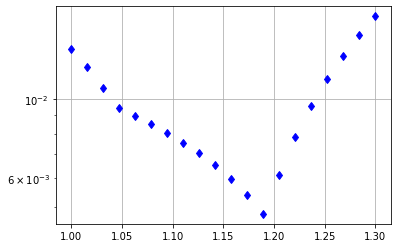

In [17]:
plt.plot(w_s, sor_err_2, 'bd')
plt.yscale('log')
plt.grid(True)
plt.show()

Mirando los valores del gráfico obtenemos que $\omega=1.189474$

In [18]:
min_pos_2 = np.argmin(sor_err_2)
X_2_sor = SOR(A_2, b_2, w_s[min_pos_2])
X_2_sor[-1]

array([1., 1., 1., 1., 1., 1.])

## Convergencia de métodos

In [19]:
# Error
e_jac = error(X_2_jac, x_2)
e_gss = error(X_2_gss, x_2)
e_sor = error(X_2_sor, x_2)

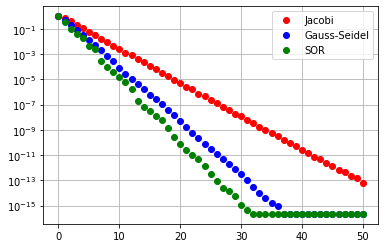

In [20]:
n_jac = np.arange(e_jac.shape[-1])
n_gss = np.arange(e_gss.shape[-1])
n_sor = np.arange(e_sor.shape[-1])
plt.plot(n_jac, e_jac, 'ro', label="Jacobi")
plt.plot(n_gss, e_gss, 'bo', label="Gauss-Seidel")
plt.plot(n_sor, e_sor, 'go', label="SOR")
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

# Ejemplo aleatorio

In [21]:
def ddMatrix(n):
    """
    Randomly generates an n x n strictly diagonally dominant matrix A.
    
    Parameters
    ----------
    n       : int 
              Matrix size
    
    Returns
    -------
    A       : (n, n) array
             Strictly diagonally dominant matrix
    """
    A = np.random.random((n,n))
    deltas = 0.5 * np.random.random(n)
    row_sum = A.sum(axis=1) - np.diag(A)
    np.fill_diagonal(A, row_sum+deltas)
    return A

In [22]:
n = 50
A_r = ddMatrix(n)
b_r = np.random.rand(n)

## Solución Analítica

In [23]:
x_r = np.linalg.solve(A_r, b_r)

## Jacobi

In [24]:
X_r_jac = jacobi(A_r, b_r, n_iter=100)

## Gauss-Seidel

In [25]:
X_r_gss = gaussSeidel(A_r, b_r, n_iter=50)

## SOR($\omega$)

Para buscar $\omega$ de *SOR*, se realiza un par de iteraciones y se analiza el error. Vamos a elegir el que tenga menor error...

In [26]:
n_w = 20
w_s = np.linspace(1, 1.3, n_w)
sor_err_r = np.zeros(n_w)
for i in range(n_w):
    X_sor_tmp = SOR(A_r, b_r, w_s[i], 5)
    sor_err_r[i] = np.linalg.norm(X_sor_tmp[-1] - x_r, np.inf)
    print("i: %d \t w: %f \t error: %f" % (i, w_s[i], sor_err_r[i]))

i: 0 	 w: 1.000000 	 error: 0.000014
i: 1 	 w: 1.015789 	 error: 0.000016
i: 2 	 w: 1.031579 	 error: 0.000019
i: 3 	 w: 1.047368 	 error: 0.000027
i: 4 	 w: 1.063158 	 error: 0.000038
i: 5 	 w: 1.078947 	 error: 0.000049
i: 6 	 w: 1.094737 	 error: 0.000063
i: 7 	 w: 1.110526 	 error: 0.000078
i: 8 	 w: 1.126316 	 error: 0.000101
i: 9 	 w: 1.142105 	 error: 0.000126
i: 10 	 w: 1.157895 	 error: 0.000155
i: 11 	 w: 1.173684 	 error: 0.000188
i: 12 	 w: 1.189474 	 error: 0.000226
i: 13 	 w: 1.205263 	 error: 0.000267
i: 14 	 w: 1.221053 	 error: 0.000314
i: 15 	 w: 1.236842 	 error: 0.000365
i: 16 	 w: 1.252632 	 error: 0.000423
i: 17 	 w: 1.268421 	 error: 0.000486
i: 18 	 w: 1.284211 	 error: 0.000555
i: 19 	 w: 1.300000 	 error: 0.000631


In [27]:
min_pos_r = np.argmin(sor_err_r)
X_r_sor = SOR(A_r, b_r, w_s[min_pos_r], n_iter=50)

## Comparación de Error

In [28]:
e_r_jac = error(X_r_jac, x_r)
e_r_gss = error(X_r_gss, x_r)
e_r_sor = error(X_r_sor, x_r)

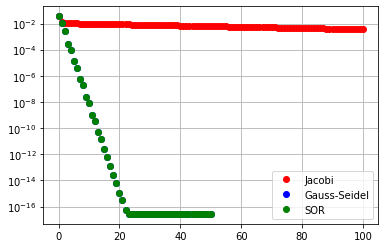

In [29]:
n_r_jac = np.arange(e_r_jac.shape[-1])
n_r_gss = np.arange(e_r_gss.shape[-1])
n_r_sor = np.arange(e_r_sor.shape[-1])
plt.plot(n_r_jac, e_r_jac, 'ro', label="Jacobi")
plt.plot(n_r_gss, e_r_gss, 'bo', label="Gauss-Seidel")
plt.plot(n_r_sor, e_r_sor, 'go', label="SOR")
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

Para analizar la convergencia de los métodos vamos a utilizar el *radio espectral* $\rho(A)$.

In [30]:
def spectralRadius(A):
    """
    Compute spectral radius of A
    
    Parameters
    ----------
    A       : (n, n) array
             A Matrix
    
    Returns
    -------
    rho     : float
             Spectral radius
    
    """
    ev = np.linalg.eigvals(A) # Compute eigenvalues
    rho = np.max(np.abs(ev)) # Largest eigenvalue in magnitude
    return rho

In [31]:
L = np.tril(A_r, k=-1)
U = np.triu(A_r, k=1)
D = A_r - L - U

In [32]:
M_r_jac = np.dot(np.linalg.inv(D), L + U)
M_r_gss = np.dot(np.linalg.inv(L + D), U)

In [33]:
sr_jac = spectralRadius(M_r_jac)
sr_gss = spectralRadius(M_r_gss)
print(sr_jac, sr_gss)

0.989112355268985 0.21169440485989235


En este caso vemos que *Gauss-Seidel* converge mucho más rápido que Jacobi.

# Teorema de los círculos de Gershgorin

In [34]:
def diskGershgorin(A):
    """
    Compute Gershgorin disks.
    
    Parameters
    ----------
    A       : (n, n) array
              Matrix
    
    Returns
    -------
    disks   : (n, 2) array
             Gershgorin disks. 
             First column is the center = |a_{ii}| and second column is radius = \sum_{i\neq j} |a_{ij}|.
    """
    n = A.shape[0]
    disks = np.zeros((n, 2)) # First column is center and second is radius
    for i in range(n):
        c = A[i, i] # Center 
        R = np.sum(np.abs(A[i])) - np.abs(c) # Sum of absolute values of rows without diagonal
        disks[i, 0] = c
        disks[i, 1] = R
    return disks

In [35]:
def circles(disks):
    """
    Return circles.
    
    Parameters
    ----------
    disks   : (n, 2) array
             Gershgorin disks. 
    
    Returns
    -------
    C       : (n, 100, 2) array
             Circles to plot.
             
    """
    n = disks.shape[0]
    N = 100
    theta = np.linspace(0, 2*np.pi, N)
    C = np.zeros((n, N, 2))
    for i in range(n):
        C[i, :, 0] = disks[i, 0] + disks[i, 1] * np.cos(theta)
        C[i, :, 1] = disks[i, 1] * np.sin(theta)
    return C

In [36]:
def plotCircles(A):
    """
    Plot Gershgorin disks and eigenvalues of A.
    
    Parameters
    ----------
    A       : (n, n) array
              Matrix
    
    Returns
    -------
    None
    """
    disks = diskGershgorin(A)
    circs = circles(disks)
    ev = np.linalg.eigvals(A)
    for i in range(disks.shape[0]):
        plt.fill(circs[i, :, 0], circs[i, :, 1], alpha=.5)
        plt.plot(ev[i], 0, 'bo')
    plt.grid(True)
    plt.axis('equal')
    plt.show()

In [37]:
A1 = np.array([
    [8, 1, 0],
    [1, 4, 0.1],
    [0, 0.1, 1]
])

In [38]:
A2 = np.array([
    [10, -1, 0, 1],
    [0.2, 8, 0.2, 0.2],
    [1, 1, 2, 1],
    [-1, -1, -1, -11]
])

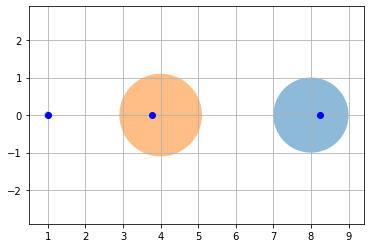

In [39]:
plotCircles(A1)

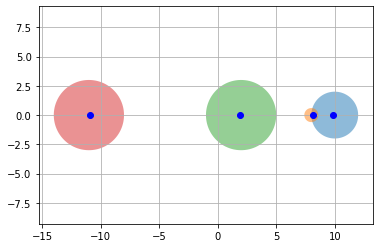

In [40]:
plotCircles(A2)

## Comentario sobre convergencia

Para un método iterativo de la forma $\mathbf{x}_{k+1}=M\mathbf{x}_k + \mathbf{\hat{b}}$, podemos usar el *radio espectral* $\rho(M)$ y así estudiar la convergencia del método. Esto implica resolver el problema
\begin{equation}
    M\mathbf{v} = \lambda \mathbf{v},
\end{equation}

para obtener los valores de $\lambda$, con una complejidad aproximada de $\sim  O(n^3)$. Si utilizamos el *Teorema de los círculos de Gershgorin*, podríamos obtener una *cota* de los valores propios con aproximadamente $\sim O(n^2)$ operaciones.

# Complejidad

Para ver los tiempos de cómputo y comparar el número de iteraciones, utilizaremos la tercera forma de representar los métodos.

In [41]:
def jacobi2(A, b, n_iter=50, tol=1e-8, x_0=None):
    """
    Solve Ax=b using Jacobi method
    
    Parameters
    -----------
    A      : (n, n) array
             A matrix 
    b      : (n, ) array
             RHS vector
    n_iter : int
             Number of iterations
    tol    : float
             Tolerance
    x_0    : (n, ) array
             Initual guess
    
    Returns
    -------
    X      : (n_iter + 1, n) array
             Matrix with approximation at each iteration
    """
    n = A.shape[0] # Matrix size
    X = np.zeros((n_iter + 1, n)) # Matrix with solution at each iteration
    # Initial guess
    if x_0 is not None:
        X[0] = x_0
    D = np.diag(A) # Diagonal of A (only keep a vector with diagonal)
    D_inv = np.diag(1 / D) # Inverse of D
    r = b - np.dot(A, X[0]) # Residual vector
    # Jacobi iteration
    for k in range(n_iter):
        X[k+1] = X[k] + np.dot(D_inv, r)
        r = b - np.dot(A, X[k+1]) # Update residual
        if np.linalg.norm(r) < tol: # Stop criteria
            X = X[:k+2]
            break
    return X

In [42]:
def gaussSeidel2(A, b, n_iter=50, tol=1e-8, x_0=None):
    """
    Solve Ax=b using Gauss-Seidel method
    
    Parameters
    -----------
    A      : (n, n) array
             A matrix 
    b      : (n, ) array
             RHS vector
    n_iter : int
             Number of iterations
    tol    : float
             Tolerance
    x_0    : (n, ) array
             Initual guess
    
    Returns
    -------
    X      : (n_iter + 1, n) array
             Matrix with approximation at each iteration
    """
    n = A.shape[0] # Matrix size
    X = np.zeros((n_iter + 1, n)) # Matrix with solution at each iteration
    # Initial guess
    if x_0 is not None:
        X[0] = x_0
    LD = np.tril(A) # Get lower triangle (L + D)
    # Get inverse in O(n^2) instead of np.linalg.inv(LD) O(n^3)
    LD_inv = solve_triangular(LD, np.eye(n), lower=True) 
    r = b - np.dot(A, X[0]) # Residual
    # Gauss-Seidel iteration
    for k in range(n_iter):
        X[k+1] = X[k] + np.dot(LD_inv, r)
        r = b - np.dot(A, X[k+1]) # Residual update
        if np.linalg.norm(r) < tol: # Stop criteria
            X = X[:k+2]
            break
    return X

In [43]:
def SOR2(A, b, w=1.05, n_iter=50, tol=1e-8, x_0=None):
    """
    Solve Ax=b using SOR(w) method
    
    Parameters
    -----------
    A      : (n, n) array
             A matrix 
    b      : (n, ) array
             RHS vector
    w      : w
             Omega parameter.
    n_iter : int
             Number of iterations
    tol    : float
             Tolerance
    x_0    : (n, ) array
             Initual guess
    
    Returns
    -------
    X      : (n_iter + 1, n) array
             Matrix with approximation at each iteration
    """
    n = A.shape[0] # Matrix size
    X = np.zeros((n_iter + 1, n)) # Matrix with solution at each iteration
    # Initial guess
    if x_0 is not None:
        X[0] = x_0
    L = np.tril(A, k=-1) # Get lower triangle 
    Dw = np.diag(np.diag(A) / w)
    # Get inverse in O(n^2) instead of np.linalg.inv(L+Dw) O(n^3)
    LDw_inv = solve_triangular(L+Dw, np.eye(n), lower=True) 
    r = b - np.dot(A, X[0]) # Residual
    # SOR iteration
    for k in range(n_iter):
        X[k+1] = X[k] + np.dot(LDw_inv, r)
        r = b - np.dot(A, X[k+1]) # Residual update
        if np.linalg.norm(r) < tol: # Stop criteria
            X = X[:k+2]
            break
    return X

A continuación se resuelven sistemas parra distintos valores de $n$, y calculamos los tiempos.

In [44]:
Ne = 5 # Number of experiments
N = 2 ** np.arange(7, 10) # N = [2^7, 2^{10}]
Nn = N.shape[-1] 
# For times
times_jac = np.zeros(Nn)
times_gss = np.zeros(Nn)
times_sor = np.zeros(Nn)

In [45]:
for i in range(Nn):
    n = N[i]
    A = ddMatrix(n)
    b = np.random.random(n)
    # Time Jacobi
    start_time= time()
    for j in range(Ne):
        x = jacobi2(A, b)
    end_time = time()
    times_jac[i] = (end_time - start_time) / Ne
    # Time G-S
    start_time = time()
    for j in range(Ne):
        x = gaussSeidel2(A, b)
    end_time = time()
    times_gss[i] = (end_time - start_time) / Ne
    # Time SOR
    start_time = time()
    for j in range(Ne):
        x = SOR2(A, b)
    end_time = time()
    times_sor[i] = (end_time - start_time) / Ne

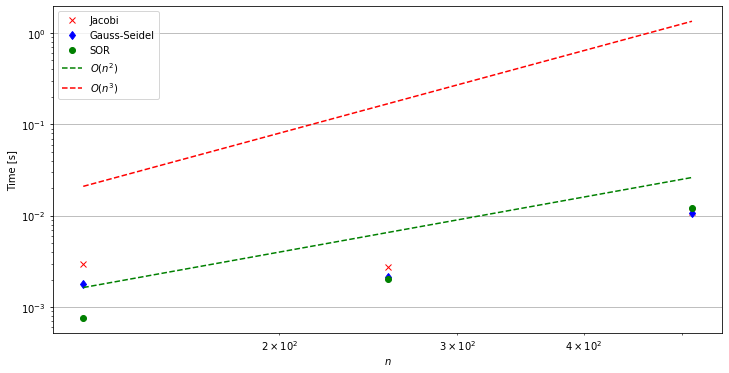

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(N, times_jac, 'rx', label="Jacobi")
plt.plot(N, times_gss, 'bd', label="Gauss-Seidel")
plt.plot(N, times_sor, 'go', label="SOR")
# Deben adaptar el coeficiente que acompaña a N**k según los tiempos que obtengan en su computador
plt.plot(N, 1e-7 * N ** 2, 'g--', label=r"$O(n^2)$") 
plt.plot(N, 1e-8 * N ** 3, 'r--', label=r"$O(n^3)$")
plt.grid(True)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r"$n$")
plt.ylabel("Time [s]")
plt.legend()
plt.show()

Del gráfico podemos confirmar que la complejidad de estos métodos es $\sim I n^2$, donde $I$ es el número de iteraciones. El valor de $I$ puede ser diferente en cada método.

# Referencias

* Sauer, T. (2006). Numerical Analysis Pearson Addison Wesley.
* https://github.com/tclaudioe/Scientific-Computing/tree/master/SC1/05_linear_systems_of_equations.ipynb